In [8]:
def find_key_in_yaml_tree(obj, key_to_find, path=None):
    if path is None:
        path = []
    results = []
    if isinstance(obj, dict):
        for k, v in obj.items():
            if k.lower() == key_to_find.lower():
                results.append((path + [k], v))
            results.extend(find_key_in_yaml_tree(v, key_to_find, path + [k]))
    elif isinstance(obj, list):
        for idx, item in enumerate(obj):
            results.extend(find_key_in_yaml_tree(item, key_to_find, path + [idx]))
    return results


In [9]:
import os
import yaml
import re
import pandas as pd
import numpy as np

rows =  []

for filename in os.listdir('../final/'):
    if filename.endswith('.yaml'):
        with open('../final/' + filename, 'r') as f:
            data = yaml.safe_load(f)

            matches = find_key_in_yaml_tree(data, "gpu")
            for match_path, match_value in matches:
                gpu_type = match_value

            matches = find_key_in_yaml_tree(data, "args")
            for match_path, match_value in matches:
                model_name = re.findall(r'--model_name (.*)(?: --.*)?', match_value[0], re.IGNORECASE)[0].split(' --')[0]
                # print(f"Model Name: {model_name}")
                tensor_parallel_size = re.findall(r'--tensor_parallel_size (\d+)(?: --|$)', match_value[0], re.IGNORECASE)

            matches = find_key_in_yaml_tree(data, "nvidia.com/gpu")
            gpu_number = [int(match_value) for match_path, match_value in matches]
            # if tensor_parallel_size:
            #     print([(int(tensor_parallel_size[0]) == num) for num in gpu_number])
            
            row = {
                'filename': filename,
                'model_name': model_name,
                'gpu_type': gpu_type,
                'tensor_parallel_size': tensor_parallel_size[0] if tensor_parallel_size else None,
                'gpu_number': gpu_number[0] if gpu_number else None
            }

            # print(row)
            rows.append(row)

df = pd.DataFrame(rows)
df

,filename,model_name,gpu_type,tensor_parallel_size,gpu_number
0,job_qwen_3_235B_multi.yaml,Qwen/Qwen3-235B-A22B-Instruct-2507,b200,8,8
1,job_qwen_3_8B_binary.yaml,Qwen/Qwen3-8B,a100,None,1
2,job_llama_4_Scout_109B_binary.yaml,meta-llama/Llama-4-Scout-17B-16E-Instruct,b200,4,4
3,job_qwen_2.5_3B_binary.yaml,Qwen/Qwen2.5-3B-Instruct,a100,None,1
4,job_qwen_3_8B_multi.yaml,Qwen/Qwen3-8B,a100,None,1
5,job_qwen_3_32B_multi.yaml,Qwen/Qwen3-32B,h200,4,4
6,job_qwen_2.5_7B_binary_many_examples.yaml,Qwen/Qwen2.5-7B-Instruct,a100,2,2
7,job_qwen_2.5_7B_binary.yaml,Qwen/Qwen2.5-7B-Instruct,a100,None,1
8,job_phi-4_15B_multi.yaml,microsoft/phi-4,a100,None,4
9,job_qwen_2.5_14B_multi.yaml,Qwen/Qwen2.5-14B-Instruct,h200,2,2


In [10]:
tdp = pd.DataFrame({
    'gpu_type': ['a100', 'h100', 'h200', 'b200'],
    'tdp': [400, 700, 700, 1000]
    })

df = df.merge(
    tdp,
    on='gpu_type',
    how='left'
)

In [11]:
unique_combinations = df[['gpu_type', 'gpu_number']].drop_duplicates()
print(unique_combinations.to_dict(orient='list'))

{'gpu_type': ['b200', 'a100', 'b200', 'h200', 'a100', 'a100', 'h200', 'b200', 'h100', 'h200'], 'gpu_number': [8, 1, 4, 4, 2, 4, 2, 2, 1, 1]}


In [12]:
# page identification runtime factors for 100 examples with model Qwen2.5 7B binary task with 3 random examples
df_qwen_7b= pd.DataFrame({'gpu_type': ['a100', 'a100', 'a100', 'a100', 'h200', 'h200', 'h200', 'b200', 'b200', 'b200', 'h100'], 'gpu_number': [1, 2, 4, 8, 1, 2, 4, 1, 2, 4, 1], 'runtime_in_s': [46.39, 24.66, 14.86, np.nan, 16.27, 10.42, 5.77, 10.24, 6.6, 4.2, 25.38], 'concurrency': [11.47, 30.25, 68.23, np.nan, 62.38, 132.23, 269.33, 82.18, 170.79, 347.23, 31.21]})
df_qwen_7b['model_name'] = 'Qwen/Qwen2.5-7B-Instruct'
df_qwen_32B = pd.DataFrame({'gpu_type': ['a100', 'a100', 'a100', 'a100', 'h200', 'h200', 'h200', 'b200', 'b200', 'b200', 'b200', 'h100'], 'gpu_number': [1, 2, 4, 8, 1, 2, 4, 1, 2, 4, 8, 1], 'runtime_in_s': [np.nan, np.nan, 61.58, 36.70, 75.84, 43.23, 22.96, 43.14, 23.82, 14.13, 9.15, np.nan], 'concurrency': [np.nan, np.nan, 8.84, 25.69, 7.67, 23.02, 53.07, 12.0, 31.45, 70.01, 0, 147.07]})
df_qwen_32B['model_name'] = 'Qwen/Qwen2.5-32B-Instruct'
df_gpu_factors = pd.concat([df_qwen_7b, df_qwen_32B], ignore_index=True)
df_gpu_factors

,gpu_type,gpu_number,runtime_in_s,concurrency,model_name
0,a100,1,46.39,11.47,Qwen/Qwen2.5-7B-Instruct
1,a100,2,24.66,30.25,Qwen/Qwen2.5-7B-Instruct
2,a100,4,14.86,68.23,Qwen/Qwen2.5-7B-Instruct
3,a100,8,NaN,NaN,Qwen/Qwen2.5-7B-Instruct
4,h200,1,16.27,62.38,Qwen/Qwen2.5-7B-Instruct
5,h200,2,10.42,132.23,Qwen/Qwen2.5-7B-Instruct
6,h200,4,5.77,269.33,Qwen/Qwen2.5-7B-Instruct
7,b200,1,10.24,82.18,Qwen/Qwen2.5-7B-Instruct
8,b200,2,6.60,170.79,Qwen/Qwen2.5-7B-Instruct
9,b200,4,4.20,347.23,Qwen/Qwen2.5-7B-Instruct


In [13]:
def compute_normalization_factor(group):
    base = group.loc[(group['gpu_type'] == 'b200') & (group['gpu_number'] == 1), 'runtime_in_s']
    if not base.empty and not np.isnan(base.values[0]) and base.values[0] != 0:
        base_runtime = base.values[0]
        return 1 / (group['runtime_in_s'] / base_runtime)
    else:
        return np.nan

df_gpu_factors['normalization_factor'] = df_gpu_factors.groupby('model_name', group_keys=False).apply(compute_normalization_factor)
df_gpu_factors['parameter_count'] = df_gpu_factors['model_name'].apply(lambda x: int(re.search(r'(\d+)(?:B|b)', x).group(1)) if re.search(r'(\d+)(?:B|b)', x) else None)
df_gpu_factors2 = df_gpu_factors.drop(columns=['model_name'])
df_gpu_factors2

/tmp/ipykernel_684806/1173623952.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_gpu_factors['normalization_factor'] = df_gpu_factors.groupby('model_name', group_keys=False).apply(compute_normalization_factor)


,gpu_type,gpu_number,runtime_in_s,concurrency,normalization_factor,parameter_count
0,a100,1,46.39,11.47,0.220737,7
1,a100,2,24.66,30.25,0.415247,7
2,a100,4,14.86,68.23,0.689098,7
3,a100,8,NaN,NaN,NaN,7
4,h200,1,16.27,62.38,0.629379,7
5,h200,2,10.42,132.23,0.982726,7
6,h200,4,5.77,269.33,1.774697,7
7,b200,1,10.24,82.18,1.000000,7
8,b200,2,6.60,170.79,1.551515,7
9,b200,4,4.20,347.23,2.438095,7


In [17]:
df['parameter_count'] = df['model_name'].apply(lambda x: int(re.search(r'(\d+)(?:B|b)', x).group(1)) if re.search(r'(\d+)(?:B|b)', x) else None)
# Manually fill in the missing parameter_count values for the two models
df.loc[df['model_name'] == 'mistralai/Mistral-Large-Instruct-2411', 'parameter_count'] = 124
df.loc[df['model_name'] == 'moonshotai/Kimi-K2-Instruct', 'parameter_count'] = 32
df.loc[df['model_name'] == 'microsoft/phi-4', 'parameter_count'] = 15

df2 = df.merge(
    df_gpu_factors2,
    on=['gpu_type', 'gpu_number'],
    how='left'
)

mltp = 16
df2 = df2[(
    ((df2['parameter_count_x'] >= mltp) & (df2['parameter_count_y'] >= mltp)) |
    ((df2['parameter_count_x'] < mltp) & (df2['parameter_count_y'] < mltp))
)]
df2['parameter_count'] = df2['parameter_count_x']
df2 = df2.drop(columns=['parameter_count_x', 'parameter_count_y', 'tensor_parallel_size'])
df2.to_csv('runtime_factors.csv', index=False)


# Plots

b200: slope = 0.7016
h200: slope = 0.8779


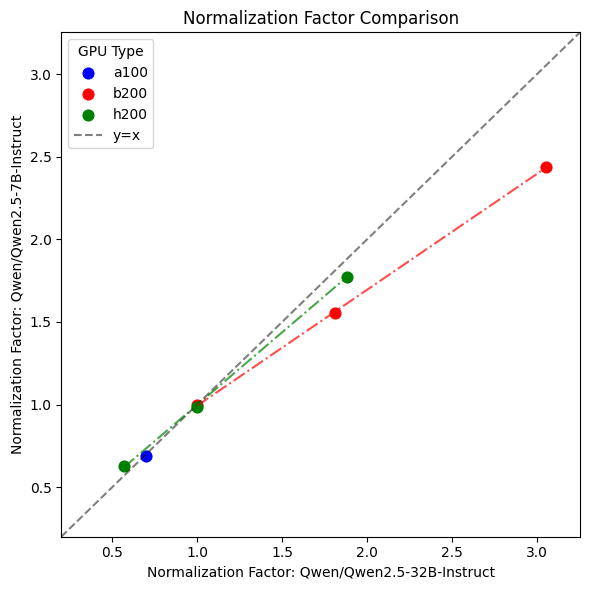

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

gpu_type_colors = {
    'a100': 'blue',
    'h100': 'orange',
    'h200': 'green',
    'b200': 'red'
}

# Pivot the dataframe to have model_name as columns and gpu_number as index
pivot_df = df_gpu_factors.pivot(index=['gpu_type', 'gpu_number'], columns='model_name', values='normalization_factor')

# Drop rows with NaN in either column (for fair comparison)
pivot_df = pivot_df.dropna()

# Get the two model names (assuming only two)
model_names = pivot_df.columns.tolist()

fig4, ax4 = plt.subplots(figsize=(6, 6))

# Color by gpu_type
for gpu_type in pivot_df.index.get_level_values(0).unique():
    idx = pivot_df.index.get_level_values(0) == gpu_type
    ax4.scatter(
        pivot_df.loc[idx, model_names[0]],
        pivot_df.loc[idx, model_names[1]],
        c=[gpu_type_colors[gpu_type]],
        s=60,
        label=gpu_type
    )

# Line y=x (intersect at 0,0, slope 1)
# Ensure the line is visible by handling inf values and setting proper limits
finite_vals = pivot_df.replace([np.inf, -np.inf], np.nan).values.flatten()
finite_vals = finite_vals[~np.isnan(finite_vals)]
if finite_vals.size > 0:
    min_val = min(finite_vals.min(), 0)+0.2
    max_val = max(finite_vals.max(), 1)+0.2
else:
    min_val, max_val = 0, 1

ax4.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='y=x')
ax4.set_xlim(min_val, max_val)
ax4.set_ylim(min_val, max_val)

# Add regression lines for each gpu_type group
for gpu_type in pivot_df.index.get_level_values(0).unique():
    idx = pivot_df.index.get_level_values(0) == gpu_type
    x = pivot_df.loc[idx, model_names[0]].values.reshape(-1, 1)
    y = pivot_df.loc[idx, model_names[1]].values
    # Only fit if there are at least 2 finite points
    mask = np.isfinite(x.flatten()) & np.isfinite(y)
    if np.sum(mask) > 1:
        reg = LinearRegression().fit(x[mask], y[mask])
        x_fit = np.linspace(x[mask].min(), x[mask].max(), 100).reshape(-1, 1)
        y_fit = reg.predict(x_fit)
        ax4.plot(x_fit, y_fit, color=gpu_type_colors[gpu_type], linestyle='dashdot', alpha=0.7)
        print(f"{gpu_type}: slope = {reg.coef_[0]:.4f}")

ax4.set_xlabel(f'Normalization Factor: {model_names[0]}')
ax4.set_ylabel(f'Normalization Factor: {model_names[1]}')
ax4.set_title('Normalization Factor Comparison')
ax4.legend(title='GPU Type')
plt.tight_layout()
plt.show()

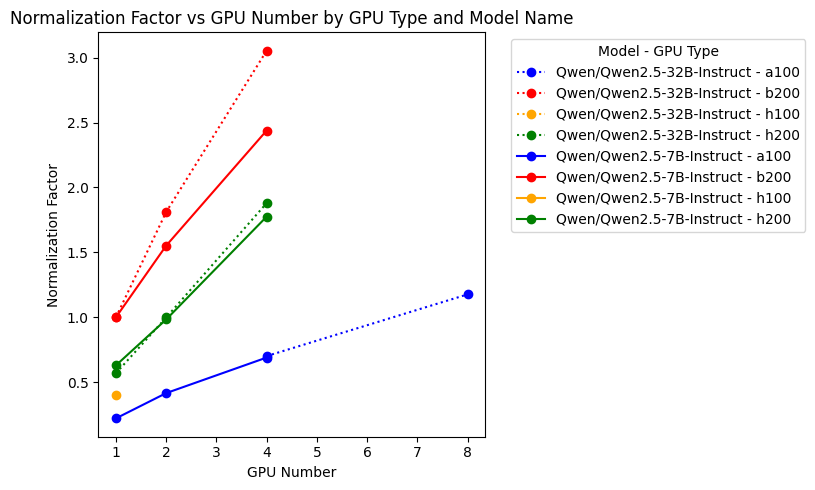

In [22]:
fig3, ax3 = plt.subplots(figsize=(8, 5))

for (model_name, gpu_type), group in df_gpu_factors.groupby(['model_name', 'gpu_type']):
    if "32B" in model_name:
        linestyle = 'dotted'
    else:
        linestyle = 'solid'
    ax3.plot(
        group['gpu_number'],
        group['normalization_factor'],
        marker='o',
        label=f"{model_name} - {gpu_type}",
        color=gpu_type_colors[gpu_type],
        linestyle=linestyle
    )

ax3.set_xlabel('GPU Number')
ax3.set_ylabel('Normalization Factor')
ax3.set_title('Normalization Factor vs GPU Number by GPU Type and Model Name')
ax3.legend(title='Model - GPU Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

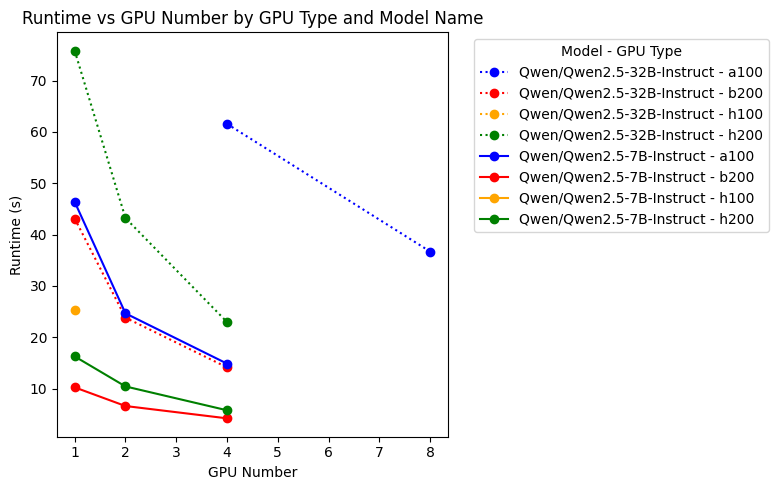

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))

for (model_name, gpu_type), group in df_gpu_factors.groupby(['model_name', 'gpu_type']):
    if "32B" in model_name:
        linestyle = 'dotted'
    else:
        linestyle = 'solid'
    ax.plot(
        group['gpu_number'],
        group['runtime_in_s'],
        marker='o',
        label=f"{model_name} - {gpu_type}",
        color=gpu_type_colors[gpu_type],
        linestyle=linestyle
    )
    # # Regression line (ignore NaNs)
    # x = group['gpu_number'].values.reshape(-1, 1)
    # y = group['runtime_in_s'].values
    # mask = ~np.isnan(y)
    # if np.sum(mask) > 1:
    #     reg = LinearRegression().fit(x[mask], y[mask])
    #     y_pred = reg.predict(x[mask])
    #     ax.plot(x[mask], y_pred, color=gpu_type_colors[gpu_type], linestyle='dashdot', alpha=0.7)
    #     print(f"{model_name} - {gpu_type}: slope = {reg.coef_[0]:.4f}")

ax.set_xlabel('GPU Number')
ax.set_ylabel('Runtime (s)')
ax.set_title('Runtime vs GPU Number by GPU Type and Model Name')
ax.legend(title='Model - GPU Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


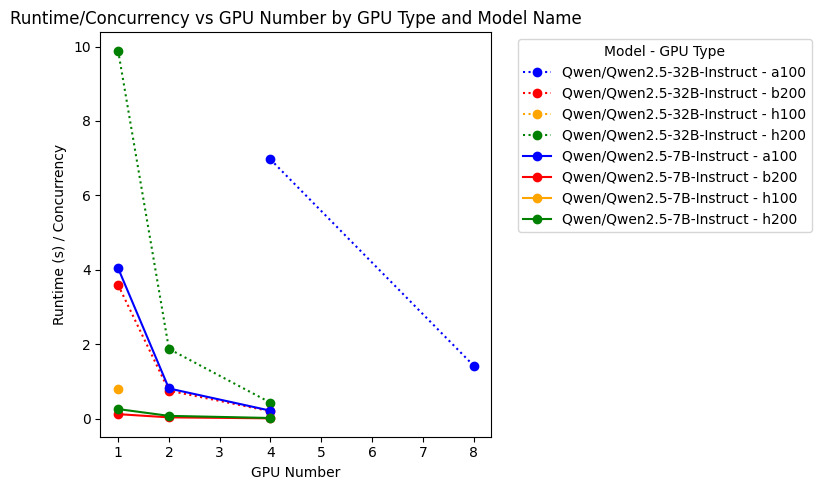

In [24]:
fig2, ax2 = plt.subplots(figsize=(8, 5))

for (model_name, gpu_type), group in df_gpu_factors.groupby(['model_name', 'gpu_type']):
    if "32B" in model_name:
        linestyle = 'dotted'
    else:
        linestyle = 'solid'
    ax2.plot(
        group['gpu_number'],
        group['runtime_in_s'] / group['concurrency'],
        marker='o',
        label=f"{model_name} - {gpu_type}",
        color=gpu_type_colors[gpu_type],
        linestyle=linestyle
    )

ax2.set_xlabel('GPU Number')
ax2.set_ylabel('Runtime (s) / Concurrency')
ax2.set_title('Runtime/Concurrency vs GPU Number by GPU Type and Model Name')
ax2.legend(title='Model - GPU Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
import os

src_dir = "."
for fname in os.listdir(src_dir):
    if fname.endswith(".yaml") and "7B" in fname:
        src_path = os.path.join(src_dir, fname)
        dst_fname = fname.replace("7B", "32B")
        dst_path = os.path.join(src_dir, dst_fname)
        with open(src_path, "r") as f:
            content = f.read()
        content = content.replace("7B", "32B").replace("7b", "32b")
        with open(dst_path, "w") as f:
            f.write(content)
        print(f"Created {dst_path}")

Created ./job_qwen_2.5_32B_binary_4_a100.yaml
Created ./job_qwen_2.5_32B_binary_1_h200.yaml
Created ./job_qwen_2.5_32B_binary_4_h200.yaml
Created ./job_qwen_2.5_32B_binary_2_a100.yaml
Created ./job_qwen_2.5_32B_binary_2_h200.yaml
Created ./job_qwen_2.5_32B_binary_4_b200.yaml
Created ./job_qwen_2.5_32B_binary_1_b200.yaml
Created ./job_qwen_2.5_32B_binary_2_b200.yaml
Created ./job_qwen_2.5_32B_binary_1_h100.yaml
Created ./job_qwen_2.5_32B_binary_1_a100.yaml
